In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [112]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Find out percentiles
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]


In [113]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

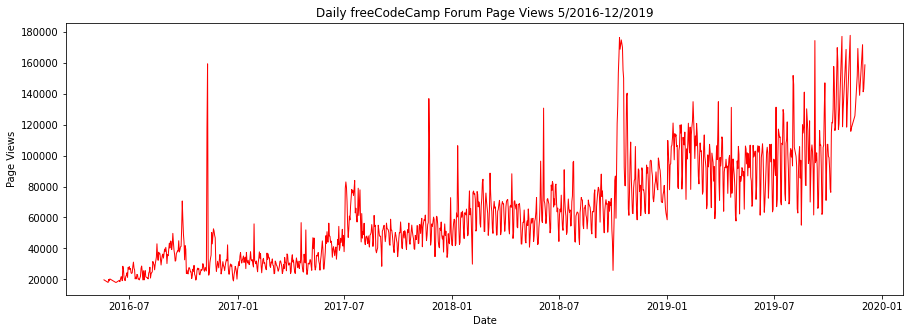

In [114]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df.index, df['value'], color='red', linewidth=1)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

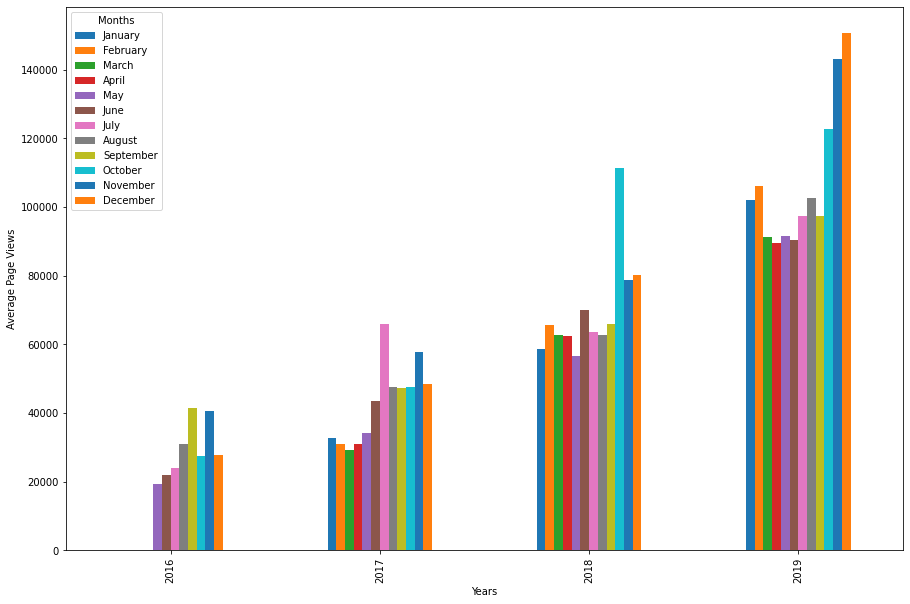

In [115]:
df_bar = df.copy()
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()

# Draw bar plot
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
#plt.xticks(rotation=30)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

Text(0, 0.5, 'Page Views')

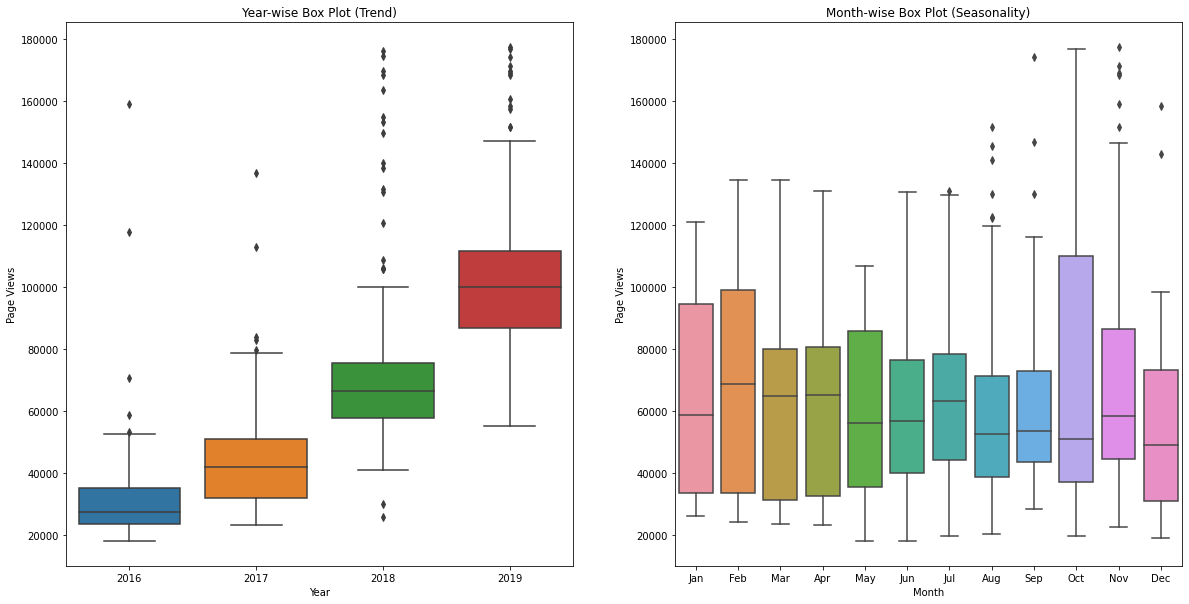

In [116]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

# Draw box plots (using Seaborn)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')